# Things to look at



In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import seaborn
import pandas as pd
#import cv2
import sys
import networkx as nx
import time
import matplotlib
import copy as cp
import scipy.ndimage as ndi 
seaborn.set(style='ticks',font_scale=1.5)


In [25]:
def get_all_transition(seq,graph_type):
    """
    What is says on the tin. Returns a list of strings describing transitions that
    is analogous to what is stored in dataframe obtained by running build_df
    """
    all_transitions = []
    lseq = len(seq)
    if graph_type=='line': s2 = seq[:-1]
    else: s2 = seq
    for kk,pk in enumerate(s2):
        #print(1)
        all_transitions.append(str(pk) + '_' + str(seq[(kk+1)%lseq]))
        if graph_type=='line':
            all_transitions.append(str(seq[(kk+1)%lseq]) + '_' + str(pk))

    if graph_type=='loop':
        for kk,pk in enumerate(s2[::-1]):
            all_transitions.append(str(pk) + '_' + str(seq[::-1][(kk+1)%lseq]))
    return all_transitions

In [26]:
def get_transitions_state(graph_type):
    
    transitions = [[i,i+1] for i in range(8)]
    transitions.extend([[i,i-1] for i in range(1,9)])
    if graph_type=='loop':
        transitions.extend([[0,8],[8,0]])
        
    all_transitions = []
    for kk, pk in enumerate(transitions):
        all_transitions.append(str(pk[0])+'_'+str(pk[1]))
    return all_transitions

# playground 

In [27]:
poke_pos = np.array([1,-1])*np.array([ [149,0],
                                 [68,19],[231,19],
                               [0,62],[149,62],[298,62],
                                 [68,105],[231,105],
                                      [149,124]])

In [28]:
G = nx.Graph()
G.add_nodes_from(range(9),pos=np.array([1,-1])*poke_pos,color='.3')

G.add_edges_from([[i,i+1] for i in range(8)])
G.add_edges_from([[i,i-1] for i in range(1,9)])
G.add_edges_from([[0,8],[8,0]])


In [29]:
poke_reorder = np.arange(9)
poke_reorder

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [30]:
plot_all_transitions([8, 4, 2, 5, 7, 0, 6, 1, 3],'loop',node_colors=np.arange(9))

NameError: name 'plot_all_transitions' is not defined

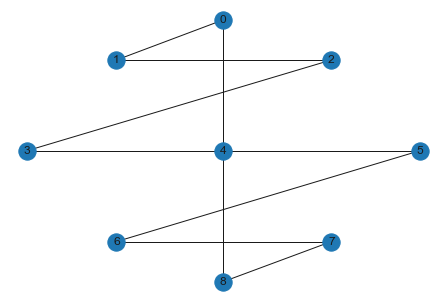

In [31]:
nx.draw(G,pos=poke_pos,with_labels = True)

In [32]:
G = nx.DiGraph()

In [33]:
G.add_node

<bound method DiGraph.add_node of <networkx.classes.digraph.DiGraph object at 0x000001E338B4C670>>

In [126]:
def plot_activity_on_graph(sequence,graph_type,order='poke',spks=None,node_size=512):
    """ This plots all transitions based on the final sequence
    
    Argument:
    ==============================
    
    order:          str (poke|state)
                    this specifies whether spks in ordered
                    in terms of pokes in physical space or in terms the
                    abstract states in the task and will change how it is plotted accordingly
    
    """
    
    if order=='poke':
        poke_pos = np.array([1,-1])*np.array([ [149,0],
                                 [68,19],[231,19],
                               [0,62],[149,62],[298,62],
                                 [68,105],[231,105],
                                      [149,124]])
    elif order=='state':
        x_ = np.linspace(0,2*np.pi,num=9).tolist()
        tmp = np.linspace(0,2*np.pi,num=9)#[x_[i] for i in sequence]
        poke_pos = np.vstack([np.sin(tmp),np.cos(tmp)]).T
    else:
        raise Exception("order argument must be set to either 'poke' or 'state'")


    if spks is None: spks='.3'
        
    G = nx.DiGraph()

    if len(spks)!='.3':
        cmap_ = 'RdBu_r'
        cmap = matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=0,vmax=np.max(spks),clip=True),cmap=cmap_)

        for i in range(9):
            c = spks[i]
            #pos = poke_pos
            G.add_node(i,pos=poke_pos[i],color=cmap.to_rgba(c))
        
    seq_inv = [sequence.index(i) for i in range(9)]
    if order=='poke':
        all_transitions = get_all_transition(sequence,graph_type)
    elif order=='state':
        all_transitions = get_transitions_state(graph_type)
    #print(all_transitions)
    for e in all_transitions:
        #print(all_transitions)
        G.add_edge(int(e[0]),int(e[-1]))

    node_colors = nx.get_node_attributes(G,'color')
    if order=='poke':
        G.edges
        nx.draw(G,
                pos=poke_pos,edge_color=".3",
                node_color=np.array(list(node_colors.values())),
                node_size=node_size,
                connectionstyle="arc3,rad=-0.1",
                width=2,
                with_labels=1
        )
    else:
        nx.draw_circular(G,
                         edge_color='.3',
                         node_color=np.array(list(node_colors.values())),
                         node_size=node_size,
                        connectionstyle="arc3,rad=-0.1",
                        width=2,
                        with_labels=1)


In [35]:
sequence = [8, 4, 2, 5, 7, 0, 6, 1, 3]
seq_inv = [sequence.index(i) for i in range(9)]

In [36]:
activity_dict = []


In [3]:
import scipy.optimize as op

'1.4.1'

In [37]:
10*np.arange(9)[sequence]

array([80, 40, 20, 50, 70,  0, 60, 10, 30])

In [38]:
spks = np.array([0,1,0,1,0,1,0,1,0])*2

In [39]:
spks.sum()

8

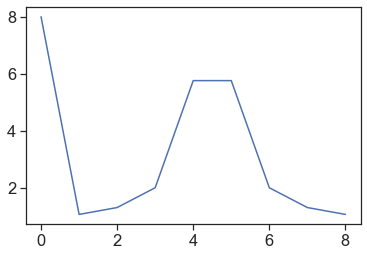

In [40]:
plt.plot(np.abs(np.fft.fft(spks)))

['0_1', '1_2', '2_3', '3_4', '4_5', '5_6', '6_7', '7_8', '1_0', '2_1', '3_2', '4_3', '5_4', '6_5', '7_6', '8_7']


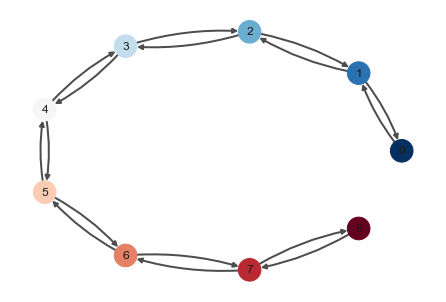

In [98]:
plot_activity_on_graph(sequence,'line',spks=10*np.arange(9),order='state')

In [42]:
#check same period across graphs

In [43]:
sys.path.append('C:/Users/yweissenberger/Documents/pycontrol_newest_10_02_21/tools/')

In [44]:
np.floor(2111/8.)

263.0

In [45]:
for i in range(7):
    print(i*263,(i+1)*263)

0 263
263 526
526 789
789 1052
1052 1315
1315 1578
1578 1841


In [46]:
import rsync

In [47]:
task_dir = r'C:\Users\yweissenberger\Documents\pycontrol_newest_10_02_21\data\mecLL_39951'

task_f = "39951-2021-08-05-140214.txt"

task_path = os.path.join(task_dir,task_f)
lines = open(task_path,'r').readlines()

In [59]:
events = eval(lines[9][2:])

In [60]:
events = eval(lines[9][2:])
bnc_ev = events['BNC_input']
sync_messages_task =[int(re.findall(r' ([0-9]*)',l)[0]) for l in lines if str(bnc_ev)+'\n' in l and l[0]=='D']
poke_event_ids = [events['poke_'+str(i)] for i in range(1,10)]
print(poke_event_ids)

In [61]:
sync_messages_task =[int(re.findall(r' ([0-9]*)',l)[0]) for l in lines if str(bnc_ev)+'\n' in l and l[0]=='D']

In [62]:
poke_event_ids = [events['poke_'+str(i)] for i in range(1,10)]
print(poke_event_ids)

[7, 9, 11, 13, 15, 17, 19, 21, 23]


In [63]:
[l for l in lines if 'task_number' in l]

['P 0 task_number0\n',
 'P 458719 task_number1\n',
 'P 985823 task_number0\n',
 'P 1260084 task_number1\n']

In [64]:
def get_in_task_pokes(lines,events,sync_thing=6779):
    all_poke_dict = []
    poke_dict = None
    for ctr_,l in enumerate(lines):
        if 'task_number'in l:
            if poke_dict is not None:
                all_poke_dict.append(cp.deepcopy(poke_dict))
            poke_dict = {}
            poke_dict['task_nr'] = re.findall(r'task_number([0-9])',l)[0]
            poke_dict['seq'] = eval(re.findall(r'seq:(\[.*\])\n',lines[ctr_+1])[0])
            print(lines[ctr_+2],poke_dict.keys())
            poke_dict['graph_type'] = re.findall(r'graph_type:([a-z]*)',lines[ctr_+2])[0]

        if 'REW_IN_SEQ' in l:
            t_ = int(re.findall(r'P ([0-9]*)',l)[0])# + sync_thing
            poke = re.findall('POKED: ([0-9])',l)[0]
            target = re.findall('TARGET: ([0-9])',l)[0]
            #print(poke,target)
            if poke==target:
                #print(poke)
                if poke in poke_dict.keys():
                    poke_dict[poke].append(t_)
                else:
                    poke_dict[poke] = [t_]
                #poke_dict[poke]
    all_poke_dict.append(poke_dict)
    return all_poke_dict

In [99]:
len(all_poke_dict)

4

In [100]:
all_poke_dict[0]

{'task_nr': '0',
 'seq': [8, 1, 6, 3, 4, 0, 7, 2, 5],
 'graph_type': 'line',
 '1': [4681,
  60760,
  64941,
  69622,
  73042,
  77025,
  80970,
  83022,
  85245,
  87267,
  126401,
  127694,
  162824,
  165695,
  166813,
  170679,
  198906,
  201764,
  231100,
  232273,
  281584,
  282644,
  304937,
  307837,
  310284,
  314732,
  397044,
  398417,
  400102,
  402406,
  406922,
  410464,
  416023,
  446863,
  451868],
 '6': [6996,
  57750,
  60416,
  87768,
  124268,
  130184,
  135152,
  160436,
  171112,
  196505,
  203477,
  205757,
  228918,
  232604,
  279243,
  283077,
  302501,
  315178,
  322774,
  394910,
  396737,
  407448,
  410130,
  419587,
  444668,
  454040],
 '3': [8831,
  57376,
  88179,
  91611,
  93949,
  95928,
  100473,
  122335,
  135531,
  141207,
  158763,
  171544,
  196150,
  206231,
  228565,
  233033,
  235151,
  278913,
  283438,
  302170,
  315641,
  321135,
  323318,
  351790,
  353884,
  355678,
  360254,
  394459,
  419975,
  444296,
  454436,
  457107]

In [67]:
all_poke_dict = get_in_task_pokes(lines,events)

P 1 graph_type:line
 dict_keys(['task_nr', 'seq'])
P 458721 graph_type:line
 dict_keys(['task_nr', 'seq'])
P 985825 graph_type:line
 dict_keys(['task_nr', 'seq'])
P 1260086 graph_type:line
 dict_keys(['task_nr', 'seq'])


# Load neural data

In [68]:

syncd1 = r'I:\all_MEC_data\05-08-21\2021-08-05_14-02-12\Record Node 101\experiment1\recording1\events\Neuropix-PXI-100.2\TTL_3'
fname = 'timestamps.npy'
sync_messages_spk = np.load(os.path.join(syncd1,fname))[::2][:-1].astype('float')

In [71]:
import scipy as sp
import scipy.signal

In [72]:
aligner = rsync.Rsync_aligner(sync_messages_spk,np.array(sync_messages_task)[1:],units_A=1/30.,units_B=1)

In [73]:

ROOT = r'D:\MEC_data\05-08-21\39951_2021-08-05_ks25'
spkT = np.load(os.path.join(ROOT,'spike_times.npy')).flatten()
spkC = np.load(os.path.join(ROOT,'spike_clusters.npy')).flatten()
cluster_labels = pd.read_table(os.path.join(ROOT,'cluster_KSLabel.tsv'))

In [74]:
single_units = np.where(cluster_labels.KSLabel=='good')[0]

In [75]:
def get_all_resps(poke_dict,single_units,spkT,spkC,window0=3000,window1=6000):
    all_resps = []
    all_resps1 = []
    all_resps2 = []
    
    all_spk_arr = [np.zeros(50000)]
    for unit in single_units:#[n_:n_+1]:
        
        spk_unit = spkT[np.where(spkC==unit)[0]]
        spk_arr = np.zeros(50000)
        
        resps = [0]*9
        resps1 = [0]*9
        resps2 = [0]*9
        for key,vals in poke_dict.items():
            if re.findall('[0-9]',key):
                aligned_T = aligner.B_to_A(vals)

                #get the spikes that are in bounds for position encoding
                pks_unit_in_bounds = np.where(np.logical_not(np.isnan(aligned_T)))[0]
                used_pks = aligned_T[pks_unit_in_bounds].astype('int')
                key = int(key)
                half_npks = int(len(used_pks)/2)
                for pk_ix,tpk in enumerate(used_pks):
                    if pk_ix<=half_npks:
                        resps2[key] += float(len(np.where(np.logical_and(spk_unit>(tpk-window0),spk_unit<(tpk+window1)))[0]))
                    else:
                        resps1[key] += float(len(np.where(np.logical_and(spk_unit>(tpk-window0),spk_unit<(tpk+window1)))[0]))

                    resps[key]+= float(len(np.where(np.logical_and(spk_unit>(tpk-window0),spk_unit<(tpk+window1)))[0]))
                    ixs2 = np.where(np.logical_and(spk_unit>(tpk-1000),spk_unit<(tpk+30000)))[0]
                    spk_arr[spk_unit[ixs2]-tpk+1000] += 1
                resps[key] = 10*resps[key]/float((len(used_pks)))
                resps1[key] = 10*resps1[key]/float(half_npks)
                resps2[key] = 10*resps2[key]/float(len(used_pks)-half_npks)

            
        all_spk_arr.append(spk_arr.copy())
        all_resps.append(resps.copy())
        all_resps1.append(resps1.copy())
        all_resps2.append(resps2.copy())
        
    return np.array(all_resps), [np.array(all_resps1),np.array(all_resps2)]

In [97]:
all_resps1_g1.shape

(320, 9)

In [135]:
all_resps_g1, (all_resps1_g1,all_resps2_g1) = get_all_resps(all_poke_dict[0],single_units,spkT,spkC)
all_resps_g2, (all_resps1_g2,all_resps2_g2) = get_all_resps(all_poke_dict[2],single_units,spkT,spkC)

C:\Users\yweissenberger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

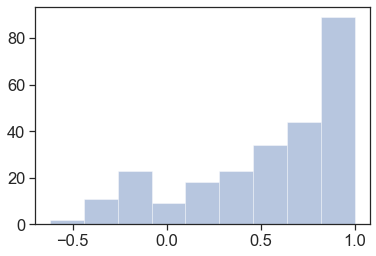

In [107]:
seaborn.distplot(ccs,kde=0)

In [105]:
ccs = []
for r1,r2 in zip(all_resps1_g1,all_resps2_g1):
    ccs.append(np.corrcoef(r1,r2)[0,1])

C:\Users\yweissenberger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\yweissenberger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [78]:
ccs = []
for r1,r2 in zip(all_resps1_g1,all_resps2_g1):
    ccs.append(np.corrcoef(r1,r2)[0,1])
print(np.nanmean(ccs))

0.5434902680886752


In [79]:
ccs = []
for r1,r2 in zip(all_resps2_g1,all_resps1_g2):
    ccs.append(np.corrcoef(r1,r2)[0,1])

In [80]:
ccs = []
for r1,r2 in zip(all_resps1_g1,all_resps2_g1):
    ccs.append(np.corrcoef(r1,r2)[0,1])
print(np.nanmean(ccs))

0.5434902680886752


# 

In [81]:
def find_max_state_projection(all_resps_g1,all_resps_g2,all_poke_dict,shuffle=False):
    seq1 = all_poke_dict[0]['seq']
    seq2 = all_poke_dict[1]['seq']

    resps_state_g1 = all_resps_g1[:,[seq1.index(i) for i in range(9)]]
    resps_state_g2 = all_resps_g2[:,[seq2.index(i) for i in range(9)]]
    
    all_ccs = []
    ordr_shuffle = np.random.permutation(resps_state_g1.shape[0])
    for ctr,resp in enumerate(resps_state_g2):
        if shuffle:
            ref = resps_state_g1[ordr_shuffle[ctr]]
        else:
            ref = resps_state_g1[ctr]
        ccs_ = []
        for orient in [lambda x: x,lambda x: np.flipud(x)]:
        
            for roll in range(9):
                r2_shift = np.roll(orient(resp),roll)

                ccs_.append(np.corrcoef(ref,r2_shift)[0,1])
        all_ccs.append(np.argmax(ccs_))
    return all_ccs

# THE FUNCTION BELOW IS PRIORITY. ITS PAINFUL BUT SORT IT OUT FFS

In [82]:
def find_best_space_projection(all_resps_g1,all_resps_g2,all_poke_dict,shuffle=False):

SyntaxError: unexpected EOF while parsing (<ipython-input-82-db18b02dfb19>, line 1)

In [83]:
state_ccs = find_max_state_projection(all_resps_g1,all_resps_g2,all_poke_dict)


C:\Users\yweissenberger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([], [])

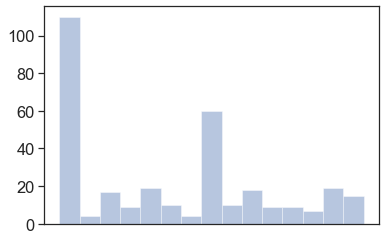

In [84]:
seaborn.distplot(state_ccs,kde=0,bins=15)
plt.xticks([])

In [85]:
np.nanmean(state_ccs)

6.2875

In [86]:
np.percentile(np.nanmean(tmp_,axis=1),95)

NameError: name 'tmp_' is not defined

NameError: name 'pos_ccs' is not defined

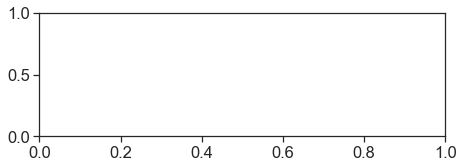

In [87]:
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
plt.scatter(pos_ccs,state_ccs)
plt.plot([-.5,1],[-.5,1],color='.3')
plt.xlabel("CC physical space \nacross 2 graphs")
plt.ylabel("CC aligned state space \nacross 2 graphs")
seaborn.despine()

plt.subplot(2,2,2)
seaborn.distplot(np.nanmean(tmp_,axis=1),kde=0,label='shuffle distribution')
plt.xlabel("Cell Shuffle across graph CC")
plt.ylabel("# of shuffles")
plt.axvline(np.percentile(np.nanmean(tmp_,axis=1),97.5),label='97.5% of shuffles',color='.3',dashes=(7,7))
plt.axvline(np.nanmean(state_ccs),label='data',color='r')
plt.legend()

plt.subplot(2,2,3)
nx.draw(G,pos=np.fliplr(poke_pos))
plt.tight_layout()
seaborn.despine()

In [88]:
kk = 1
plt.figure(figsize=(4,12))
for i in np.where(np.array(state_ccs)>(0.3+np.array(pos_ccs)))[0]:
    plt.subplot(14,2,kk)
    nx.draw(G,pos=np.fliplr(poke_pos),node_color=all_resps_g1[i],node_size=200)
    kk+= 1
    plt.subplot(14,2,kk)
    nx.draw(G,pos=np.fliplr(poke_pos),node_color=all_resps_g2[i],node_size=200)
    kk+= 1


NameError: name 'pos_ccs' is not defined

<Figure size 288x864 with 0 Axes>

In [89]:
tmp_ = []
for iterN in range(1000):
    sys.stdout.write('\r iter:{}'.format(iterN))
    sys.stdout.flush()
    state_ccs = find_max_state_projection(all_resps_g1,all_resps_g2,all_poke_dict)
    tmp_.append(state_ccs)

 iter:35

KeyboardInterrupt: 

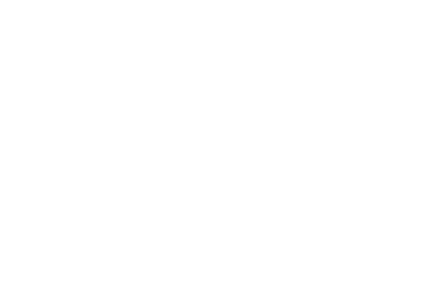

In [90]:
nx.draw(G,pos=np.fliplr(poke_pos))

In [91]:
pos_ccs = []
for r1,r2 in zip(all_resps1_g1,all_resps2_g1):
    pos_ccs.append(np.corrcoef(r1,r2)[0,1])
print(np.nanmean(ccs))

0.5434902680886752


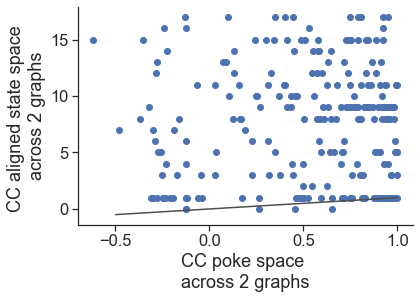

In [92]:
plt.scatter(pos_ccs,state_ccs)
plt.plot([-.5,1],[-.5,1],color='.3')
plt.xlabel("CC poke space \nacross 2 graphs")
plt.ylabel("CC aligned state space \nacross 2 graphs")
seaborn.despine()

In [93]:
from scipy.ndimage import gaussian_filter1d

In [94]:
plt.plot(gaussian_filter1d(spk_arr,2,mode='nearest'))


NameError: name 'spk_arr' is not defined

In [722]:
[[8, 4, 2, 5, 7, 0, 6, 1, 3].index(i) for i in range(9)]

[5, 7, 2, 8, 1, 3, 6, 4, 0]

In [723]:
all_resps_g1 = np.array(all_resps_g1)

In [ ]:
all

In [724]:
resps_state_g1 = all_resps_g1[:,[[8, 4, 2, 5, 7, 0, 6, 1, 3].index(i) for i in range(9)]]

In [725]:
G = nx.Graph()

In [726]:
G = nx.Graph()
G.add_edges_from([[i,i+1] for i in range(8)])
G.add_edges_from([[i,i-1] for i in range(1,9)])
G.add_edges_from([[0,8],[8,0]])

In [127]:
sequence

[8, 4, 2, 5, 7, 0, 6, 1, 3]

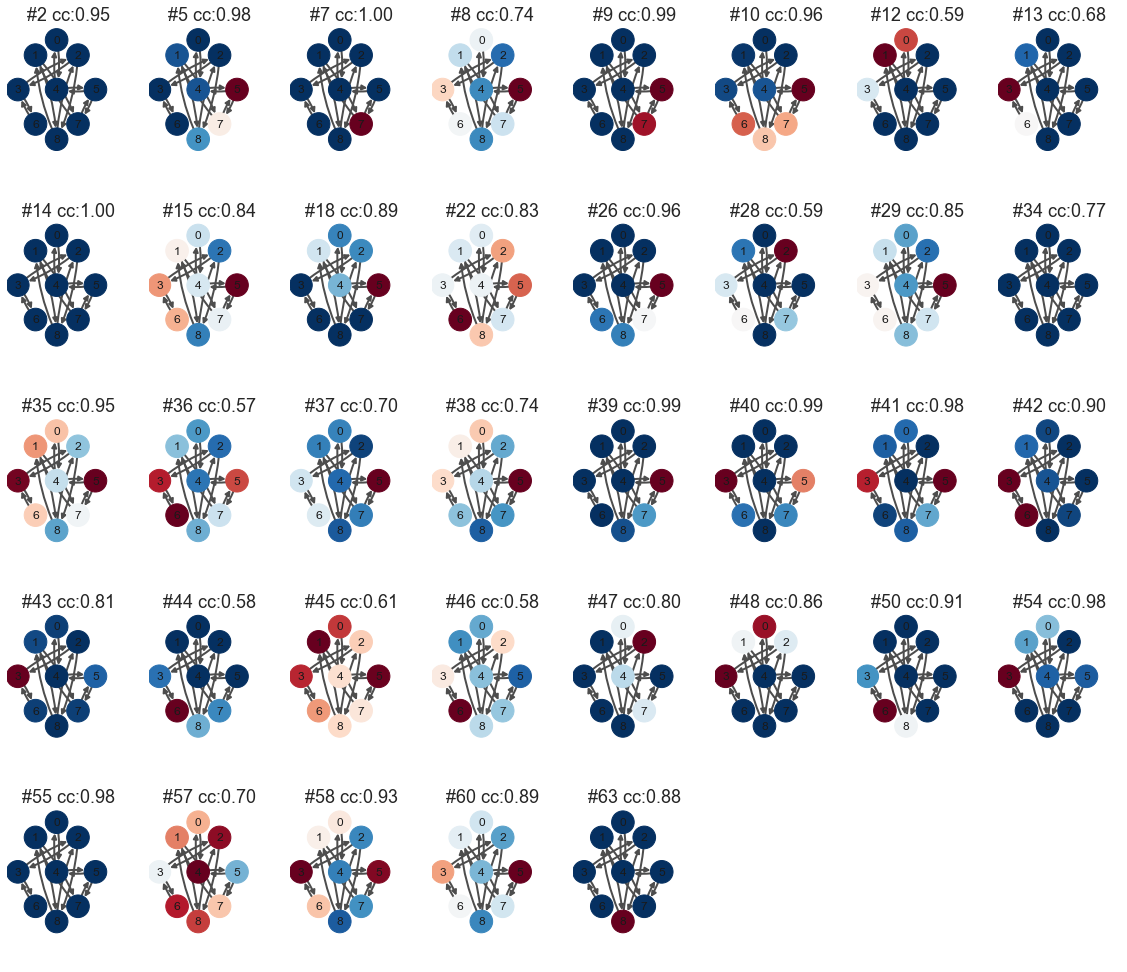

In [136]:
plt.figure(figsize=(16,22))
ctr = 0
for ctr_,spks in enumerate(all_resps1_g2[:64]):
    if ccs[ctr_]>0.5:
        plt.subplot(8,8,ctr+1)
        plt.title('#'+str(ctr_) + ' cc:' + '{:.2f}'.format(ccs[ctr_]))
        #nx.draw_circular(G,node_color=spks,node_size=512)
        plot_activity_on_graph(all_poke_dict[1]['seq'],'line',spks=spks,order='poke',node_size=512)
        axis = plt.gca()
        # maybe smaller factors work as well, but 1.1 works fine for this minimal example
        axis.set_xlim([1.3*x for x in axis.get_xlim()])
        axis.set_ylim([1.3*y for y in axis.get_ylim()])
        ctr+= 1

plt.tight_layout()

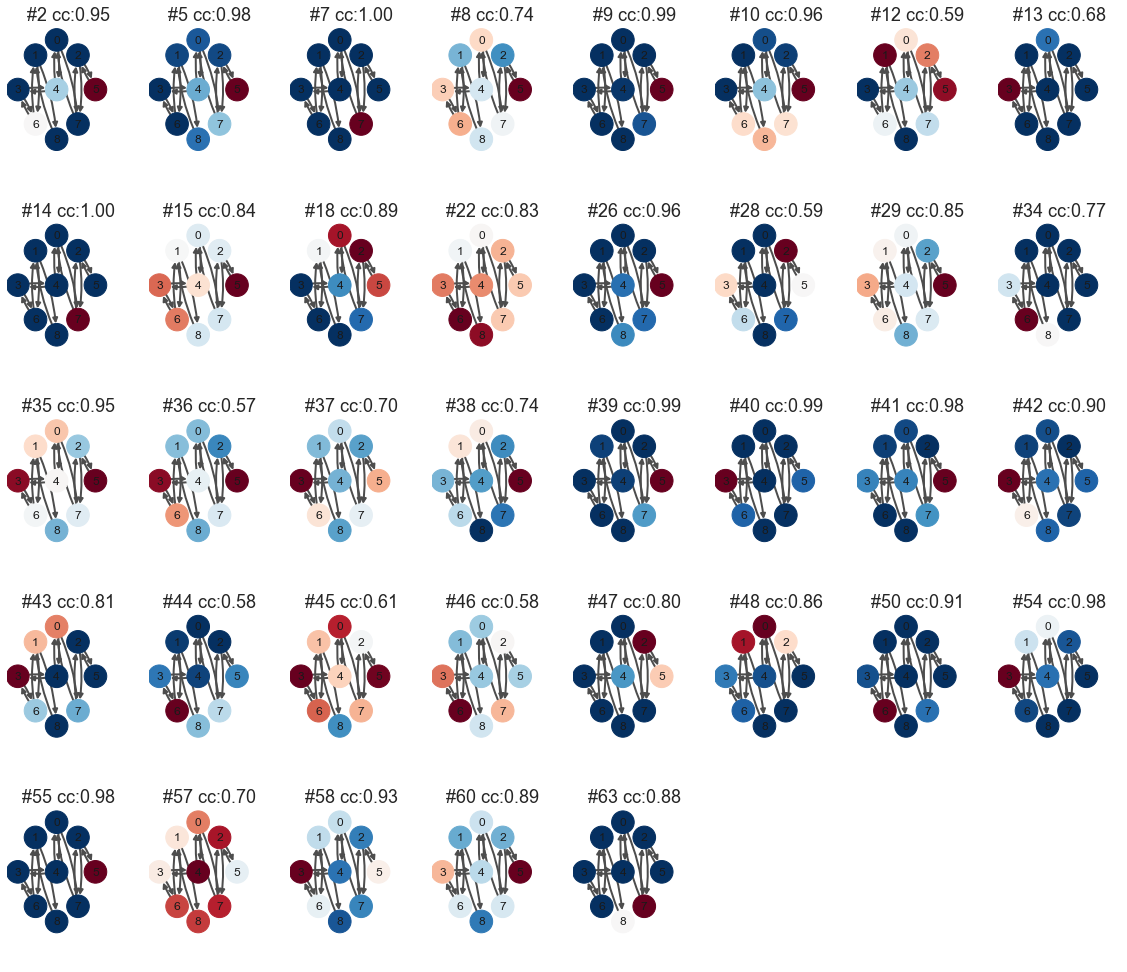

In [133]:
plt.figure(figsize=(16,22))
ctr = 0
for ctr_,spks in enumerate(all_resps1_g1[:64]):
    if ccs[ctr_]>0.5:
        plt.subplot(8,8,ctr+1)
        plt.title('#'+str(ctr_) + ' cc:' + '{:.2f}'.format(ccs[ctr_]))
        #nx.draw_circular(G,node_color=spks,node_size=512)
        plot_activity_on_graph(all_poke_dict[0]['seq'],'line',spks=spks,order='poke',node_size=512)
        axis = plt.gca()
        # maybe smaller factors work as well, but 1.1 works fine for this minimal example
        axis.set_xlim([1.3*x for x in axis.get_xlim()])
        axis.set_ylim([1.3*y for y in axis.get_ylim()])
        ctr+= 1

plt.tight_layout()

In [111]:
resps_state_g1 = all_resps1_g1[:,all_poke_dict[0]['seq']]

In [116]:
resps_state_g1[0].shape

(9,)

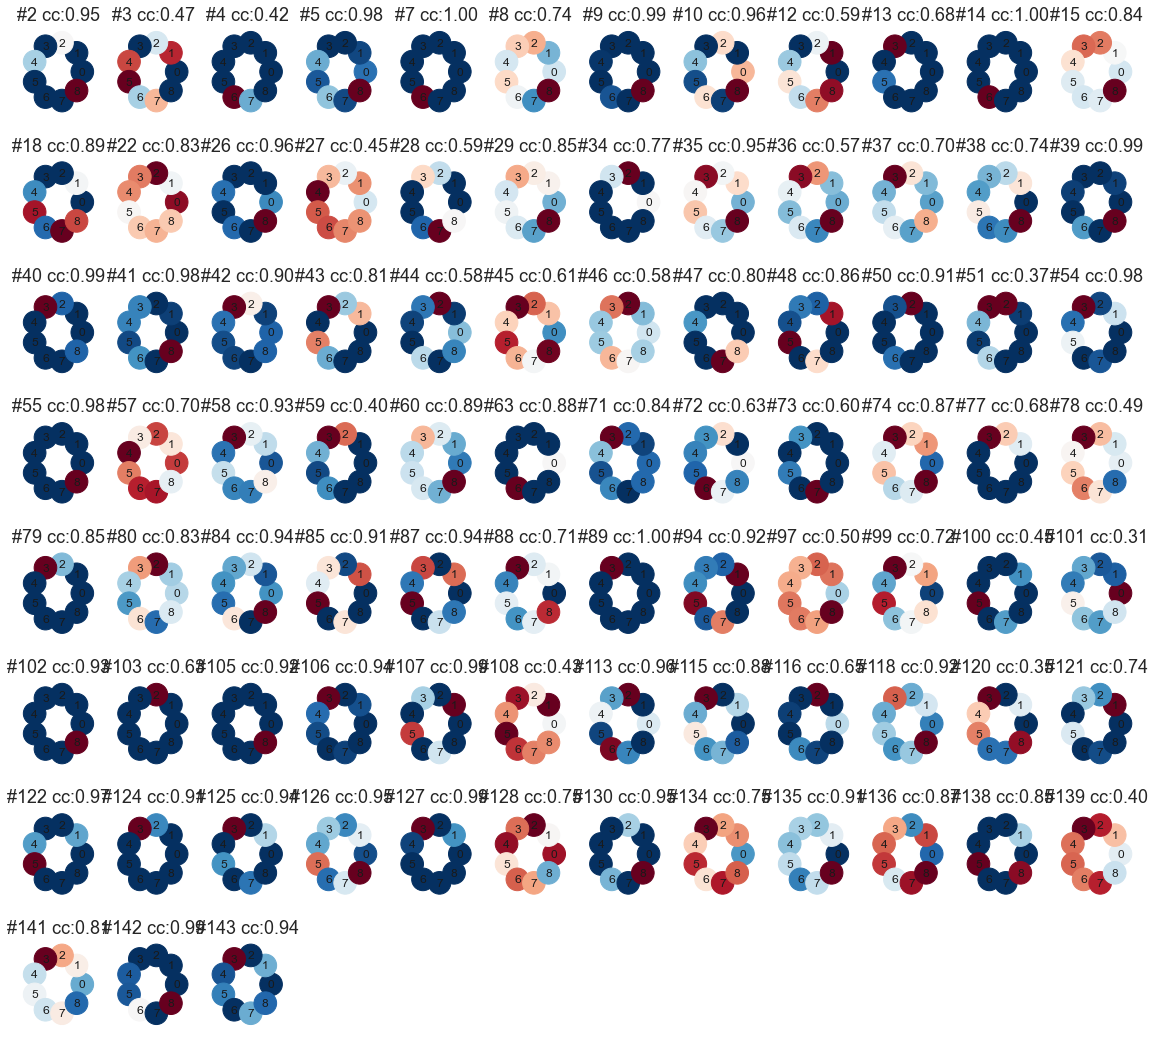

In [124]:
plt.figure(figsize=(16,22))
ctr = 0
resps_state_g1 = all_resps1_g1[:,all_poke_dict[0]['seq']]
for ctr_,spks in enumerate(resps_state_g1[:144]):
    if ccs[ctr_]>0.3:
        plt.subplot(12,12,ctr+1)
        plt.title('#'+str(ctr_) + ' cc:' + '{:.2f}'.format(ccs[ctr_]))
        #nx.draw_circular(G,node_color=spks,node_size=512)
        plot_activity_on_graph(all_poke_dict[0]['seq'],'line',spks=spks,order='state')
        axis = plt.gca()
        # maybe smaller factors work as well, but 1.1 works fine for this minimal example
        axis.set_xlim([1.3*x for x in axis.get_xlim()])
        axis.set_ylim([1.3*y for y in axis.get_ylim()])
        ctr+= 1

plt.tight_layout()

In [120]:
all_poke_dict[0]

{'task_nr': '0',
 'seq': [8, 1, 6, 3, 4, 0, 7, 2, 5],
 'graph_type': 'line',
 '1': [4681,
  60760,
  64941,
  69622,
  73042,
  77025,
  80970,
  83022,
  85245,
  87267,
  126401,
  127694,
  162824,
  165695,
  166813,
  170679,
  198906,
  201764,
  231100,
  232273,
  281584,
  282644,
  304937,
  307837,
  310284,
  314732,
  397044,
  398417,
  400102,
  402406,
  406922,
  410464,
  416023,
  446863,
  451868],
 '6': [6996,
  57750,
  60416,
  87768,
  124268,
  130184,
  135152,
  160436,
  171112,
  196505,
  203477,
  205757,
  228918,
  232604,
  279243,
  283077,
  302501,
  315178,
  322774,
  394910,
  396737,
  407448,
  410130,
  419587,
  444668,
  454040],
 '3': [8831,
  57376,
  88179,
  91611,
  93949,
  95928,
  100473,
  122335,
  135531,
  141207,
  158763,
  171544,
  196150,
  206231,
  228565,
  233033,
  235151,
  278913,
  283438,
  302170,
  315641,
  321135,
  323318,
  351790,
  353884,
  355678,
  360254,
  394459,
  419975,
  444296,
  454436,
  457107]